<a href="https://colab.research.google.com/github/OmdenaAI/abakaliki-chapter-theft-churches-problem/blob/main/Copy_of_Naira_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To ensure that our dependencies and libraries needed for this project are are available and upto date
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Avoid OOM errors
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_dir='/content/drive/MyDrive/sorted_data'
os.listdir(data_dir)

['#20', '#200', '#500', '#50', '#1000', '#10', '#100', '#5']

In [6]:
img_extension=['jpeg','jpg','png']

In [7]:
img_array=cv2.imread(os.path.join(data_dir,'#10', '10.jpg'))


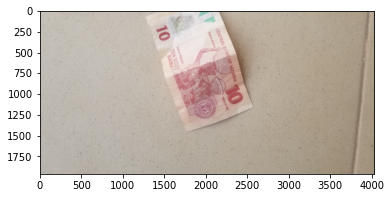

In [8]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [9]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,img_class)):
    image_path = os.path.join(data_dir,img_class, image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in img_extension:
        print('image {} does not have apt extension'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('{} ia a problematic file'.format(image_path))

In [10]:
# putting our cleaned data into keras and building our data pipeline
dataset= tf.keras.utils.image_dataset_from_directory(data_dir)
dataset

Found 543 files belonging to 8 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
#+for looping through our data pipeline or allowing access to data pipeline
data_iterator = dataset.as_numpy_iterator()

In [12]:
# actually accessing data pipeline
batch= data_iterator.next()

In [13]:
len(batch)

2

In [14]:
print(batch[0])
print(batch[1])

[[[[224.83008 219.83008 213.83008]
   [221.79688 217.79688 208.79688]
   [215.19336 211.86523 202.86523]
   ...
   [202.92188 190.92188 174.92188]
   [202.54688 191.54688 173.54688]
   [200.95312 192.00977 173.8711 ]]

  [[224.625   220.625   211.625  ]
   [223.01367 219.01367 210.01367]
   [222.10938 215.10938 207.10938]
   ...
   [201.13867 189.13867 173.13867]
   [198.99805 186.99805 170.99805]
   [198.00586 187.00586 169.00586]]

  [[223.58398 219.95898 210.95898]
   [219.67383 215.67383 206.67383]
   [217.      210.      202.     ]
   ...
   [203.71875 191.71875 175.71875]
   [203.4707  192.4707  174.4707 ]
   [199.79102 188.79102 170.79102]]

  ...

  [[193.625   184.625   175.625  ]
   [209.15625 202.53125 194.40625]
   [216.08008 213.08008 208.08008]
   ...
   [178.2793  163.2793  142.2793 ]
   [174.29102 159.29102 138.29102]
   [182.68164 167.68164 144.68164]]

  [[194.23438 184.23438 174.23438]
   [199.84375 190.84375 183.84375]
   [211.73438 206.73438 200.73438]
   ...
   [1

In [15]:
print(batch[0].shape) # images represented as numpy array
print(batch[1].shape) #classes the images belong to

(32, 256, 256, 3)
(32,)


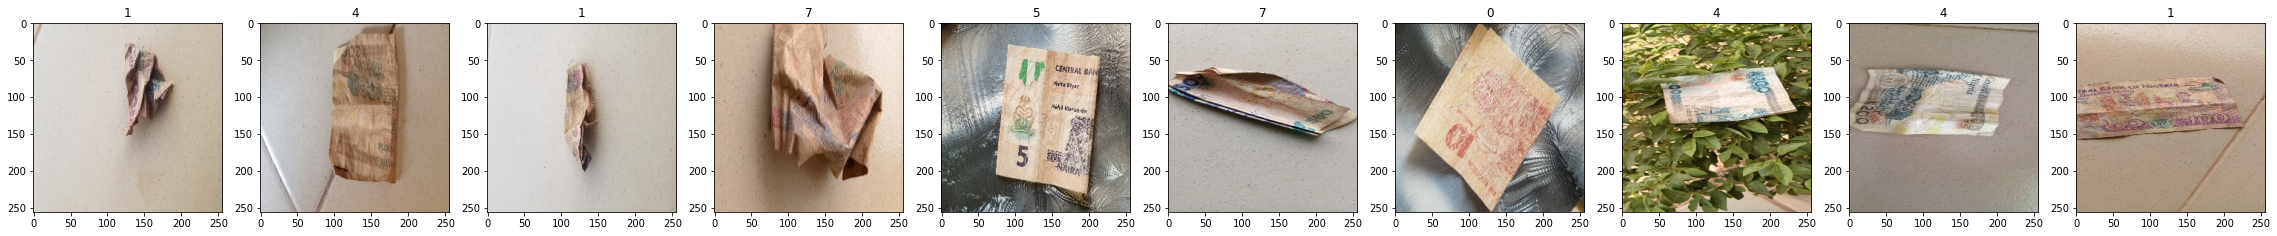

In [16]:
# to dictate which class represent a particular group of data
fig, ax = plt.subplots(ncols=10, figsize=(40,40))
for idx, img in enumerate(batch[0][:10]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [17]:
'''
0 = #10
1 = #100
2 = #1000
3 = #20
4 = #200
5 = #5
6 = #50
7 = #500
'''

'\n0 = #10\n1 = #100\n2 = #1000\n3 = #20\n4 = #200\n5 = #5\n6 = #50\n7 = #500\n'

# Data Preprocessing

In [18]:
scaled_data=dataset.map(lambda x, y: (x/255, y))
scaled_iterator= scaled_data.as_numpy_iterator()
scaled_batch= scaled_iterator.next()

In [19]:
print(scaled_batch[0].max())
print(scaled_batch[0].min())

1.0
0.0


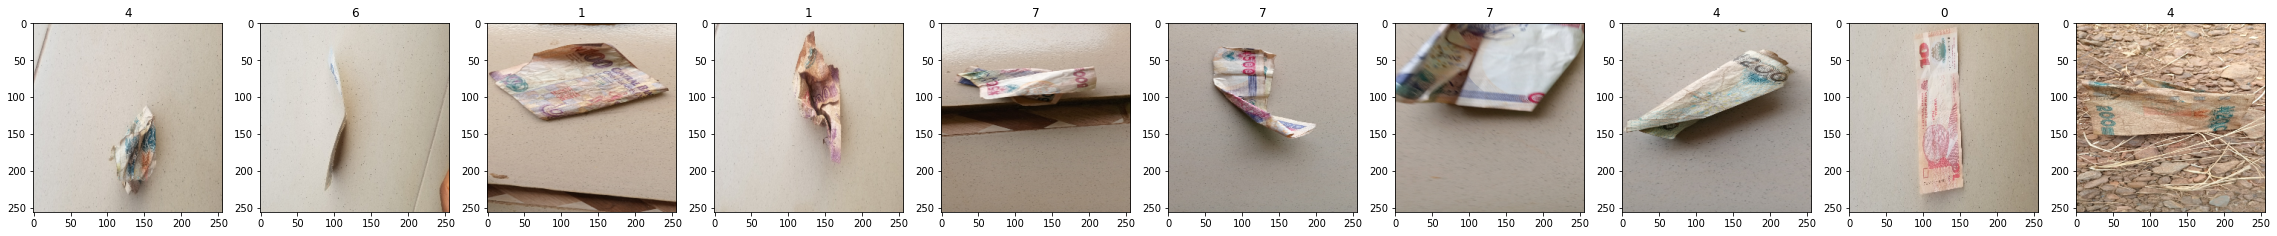

In [20]:
fig, ax = plt.subplots(ncols=10, figsize=(40,40))
for idx, img in enumerate(scaled_batch[0][:10]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(scaled_batch[1][idx])

In [21]:
len(scaled_data)

17

In [22]:
#splitting data into test, train and validation
train_size=int(len(scaled_data)*.625)
val_size=int(len(scaled_data)*.25)
test_size=int(len(scaled_data)*.125)

In [23]:
train=scaled_data.take(train_size)
val=scaled_data.skip(train_size).take(val_size)
test=scaled_data.skip(train_size+val_size).take(test_size)

# 2.0 Model Building

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential(
    [
        Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)),
        MaxPooling2D(),
     
        Conv2D(32,(3,3),1, activation='relu'),
        MaxPooling2D(),
     
        Conv2D(16,(3,3),1, activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
     
        Dense(256, activation='relu'),
        Dense(8, activation='softmax')
    ]
)


In [26]:
model.compile('adam', loss= tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 2.1 Training

In [28]:
log_dir='/content/drive/MyDrive/logdir'

In [29]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [30]:
history = model.fit(train, epochs= 20, validation_data=val, callbacks= [tb_callback])

Epoch 1/20
10/10 [==============================] - 44s 3s/step - loss: 1.8366 - accuracy: 0.3313 - val_loss: 1.5883 - val_accuracy: 0.2734
Epoch 2/20
10/10 [==============================] - 38s 3s/step - loss: 1.4673 - accuracy: 0.3656 - val_loss: 1.4124 - val_accuracy: 0.5156
Epoch 3/20
10/10 [==============================] - 38s 3s/step - loss: 1.3297 - accuracy: 0.4938 - val_loss: 1.0792 - val_accuracy: 0.6719
Epoch 4/20
10/10 [==============================] - 38s 3s/step - loss: 1.1351 - accuracy: 0.5656 - val_loss: 0.9484 - val_accuracy: 0.6406
Epoch 5/20
10/10 [==============================] - 38s 3s/step - loss: 0.9680 - accuracy: 0.5969 - val_loss: 0.8396 - val_accuracy: 0.6797
Epoch 6/20
10/10 [==============================] - 38s 3s/step - loss: 0.8668 - accuracy: 0.6938 - val_loss: 0.6947 - val_accuracy: 0.7422
Epoch 7/20
10/10 [==============================] - 37s 3s/step - loss: 0.8175 - accuracy: 0.6500 - val_loss: 0.7131 - val_accuracy: 0.7266
Epoch 8/20
10/10 [==

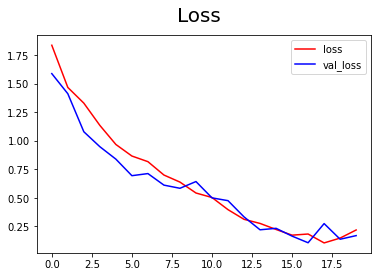

In [31]:
fig=plt.figure()
plt.plot(history.history['loss'], color='red', label= 'loss')
plt.plot(history.history['val_loss'], color='blue', label= 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

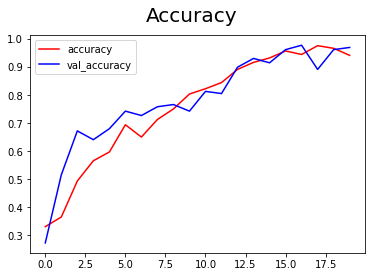

In [32]:
fig=plt.figure()
plt.plot(history.history['accuracy'], color='red', label= 'accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label= 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 2.2 Evaluation

In [33]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score

In [34]:
yhat=[]
y_actual=[]
for batch in test.as_numpy_iterator():
    #for sets in batch:
    x, y = batch
    
    y_pred= model.predict(x)
    y_pred= np.argmax(y_pred,axis=1)
    y_pred= np.array(y_pred)
    
    yhat.append(y_pred)
    y_actual.append(y)

#y_pred=[np.argmax(value) for value in y_pred]     

1/1 [==============================] - 0s 28ms/step


In [35]:
yhat=np.append(yhat[0],yhat[1])
y_actual=np.append(y_actual[0],y_actual[1])

In [36]:
precision= precision_score(y_actual, yhat, average='weighted')
recall= recall_score(y_actual, yhat, average='weighted')
accuracy= accuracy_score(y_actual, yhat)

print(f'precision : {precision}, Recall : {recall}, Accuracy : {accuracy}')

precision : 0.9573412698412698, Recall : 0.953125, Accuracy : 0.953125


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_actual, yhat)

array([[ 4,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0, 13,  0],
       [ 0,  1,  1,  0,  0,  6]])

In [38]:
from sklearn.metrics import f1_score

print('macro_f1 :{}'.format(f1_score(y_actual, yhat, average='macro')))
print('micro_f1 :{}'.format(f1_score(y_actual, yhat, average='micro')))
print('weighted_f1 :{}'.format(f1_score(y_actual, yhat, average='weighted')))
print('No_Average_f1 :{}'.format(f1_score(y_actual, yhat, average=None)))
print('No_Average_f1 :{}'.format(f1_score(y_actual, yhat, average=None)))


macro_f1 :0.9561486744652693
micro_f1 :0.953125
weighted_f1 :0.9517131717185519
No_Average_f1 :[1.         0.94117647 0.97560976 1.         0.96296296 0.85714286]
No_Average_f1 :[1.         0.94117647 0.97560976 1.         0.96296296 0.85714286]


In [39]:
dict1= {0 : '#10', 1 : '#100', 2 : '#1000', 3 : '#20', 4 : '#200', 5 : '#5', 6 : '#50', 7 : '#500'}
prediction=[]
for x in yhat:
  y=dict1[x]
  prediction.append(y)
  
prediction

['#50',
 '#500',
 '#100',
 '#50',
 '#50',
 '#100',
 '#200',
 '#200',
 '#50',
 '#200',
 '#500',
 '#50',
 '#5',
 '#200',
 '#100',
 '#200',
 '#100',
 '#200',
 '#200',
 '#100',
 '#200',
 '#200',
 '#200',
 '#200',
 '#50',
 '#100',
 '#5',
 '#10',
 '#100',
 '#200',
 '#50',
 '#200',
 '#200',
 '#100',
 '#100',
 '#100',
 '#200',
 '#50',
 '#100',
 '#50',
 '#500',
 '#100',
 '#50',
 '#200',
 '#200',
 '#10',
 '#500',
 '#200',
 '#50',
 '#50',
 '#500',
 '#50',
 '#200',
 '#100',
 '#200',
 '#100',
 '#100',
 '#100',
 '#10',
 '#500',
 '#10',
 '#100',
 '#200',
 '#100']

# Test

testing our model using random pictures

In [40]:
test_dir='/content/drive/MyDrive/Test_images'
os.listdir(test_dir)

['20230102_071707.jpg',
 '20230102_071712.jpg',
 '20230102_071714.jpg',
 '20230111_125042.jpg',
 '20230115_082900.jpg',
 '20230115_082833.jpg',
 '20230115_083342.jpg',
 '20230115_083346.jpg']

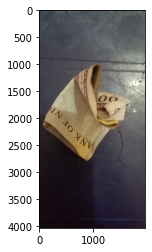

In [41]:
img = cv2.imread(os.path.join(test_dir,'20230111_125042.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

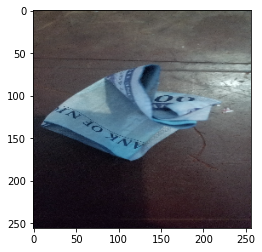

In [42]:
resized_img=tf.image.resize(img,(256,256))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

In [43]:
pred=model.predict(np.expand_dims(resized_img/255,0))
pred= np.argmax(pred,axis=1)
print(f'Currency :{dict1[pred[0]]}')


1/1 [==============================] - 0s 249ms/step
Currency :#200
